In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
data = pd.read_csv('/content/creditcard.csv')
data.info()
data['Class'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75357 entries, 0 to 75356
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    75357 non-null  int64  
 1   V1      75357 non-null  float64
 2   V2      75357 non-null  float64
 3   V3      75357 non-null  float64
 4   V4      75357 non-null  float64
 5   V5      75357 non-null  float64
 6   V6      75357 non-null  float64
 7   V7      75357 non-null  float64
 8   V8      75357 non-null  float64
 9   V9      75357 non-null  float64
 10  V10     75357 non-null  float64
 11  V11     75357 non-null  float64
 12  V12     75357 non-null  float64
 13  V13     75357 non-null  float64
 14  V14     75357 non-null  float64
 15  V15     75357 non-null  float64
 16  V16     75357 non-null  float64
 17  V17     75357 non-null  float64
 18  V18     75357 non-null  float64
 19  V19     75357 non-null  float64
 20  V20     75357 non-null  float64
 21  V21     75357 non-null  float64
 22

0.0    75173
1.0      183
Name: Class, dtype: int64

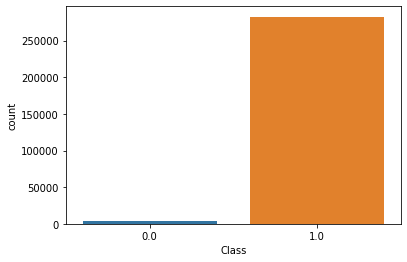

In [8]:
data_majority = data[(data['Class']==0)]
data_minority = data[(data['Class']==1)]

data_minority_upsampled = resample(data_minority,replace='True',n_samples=282652,random_state=99)

data_final = pd.concat([data_minority_upsampled,data_majority])

sns.countplot(x = data_final['Class'])

In [9]:
data_final_x = data_final.drop('Class',axis=1)
data_final_y = data_final['Class']

x_train, x_test, y_train, y_test = train_test_split(data_final_x, data_final_y, test_size=0.1, random_state=99)

ss = StandardScaler()

x_train_f = ss.fit_transform(x_train)
x_test_f = ss.fit_transform(x_test)

pca = PCA()

x_train_f = pca.fit_transform(x_train)
x_test_f = pca.fit_transform(x_test)

print(f"x train shape: {x_train_f.shape}")
print(f"x test shape: {x_test_f.shape}")

print(f"y train shape: {y_train.shape}")
print(f"y test shape: {y_test.shape}")

x train shape: (257959, 30)
x test shape: (28663, 30)
y train shape: (257959,)
y test shape: (28663,)


In [10]:
model = XGBClassifier()
model.fit(x_train_f,y_train)
prediction = model.predict(x_test_f)

In [11]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       438
         1.0       1.00      1.00      1.00     28225

    accuracy                           1.00     28663
   macro avg       1.00      1.00      1.00     28663
weighted avg       1.00      1.00      1.00     28663

